# Predicting Stock Prices
Code for [Predicting Stock Prices - Learn Python for Data Science #4](https://youtu.be/SSu00IRRraY) <br>
Importing libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import csv

### Parse data function
Getting data from csv file. <br>
table: [date, close, volume, open , high, low]

In [2]:
def parse_data(filename):
    dates = []
    prices = []
    with open(filename, 'r') as file:
        # csv file reader, avoid first and second line
        csvReader = csv.reader(file)
        next(csvReader)
        next(csvReader)
        
        for row in csvReader:
            # date: [yyyy/mm/dd], we need day
            dates.append(int(row[0].split('/')[2]))
            # close price
            prices.append(float(row[1]))
            
    # reshape input and return
    dates = np.reshape(dates, (len(dates), 1))
    return dates, prices

### Load Data
Load data from csv file using parse function. <br>
Input: dates <br>
Output: prices

In [3]:
dates, prices = parse_data('data/appleHistoricalQuotes.csv')

for date, price in zip(dates, prices):
    print('Close price at day {}: {}'.format(date, price))

Close price at day [24]: 152.7
Close price at day [23]: 153.92
Close price at day [22]: 153.3
Close price at day [18]: 156.82
Close price at day [17]: 155.86
Close price at day [16]: 154.94
Close price at day [15]: 153.07
Close price at day [14]: 150.0
Close price at day [11]: 152.29
Close price at day [10]: 153.8
Close price at day [9]: 153.31
Close price at day [8]: 150.75
Close price at day [7]: 147.93
Close price at day [4]: 148.26
Close price at day [3]: 142.19
Close price at day [2]: 157.92


### Models
Initializing SVR classifier with three different kernels.

In [4]:
names = ['Linear model', 'Polynomial model', 'RBF model']

models = [
    SVR(kernel='linear', C=1e3),
    SVR(kernel='poly', C=1e3, degree=2),
    SVR(kernel='rbf', C=1e3, gamma=0.1)]

### Training
Training all classifiers with same data for predicting stock prices.

In [5]:
def train_models(dates, prices, models, names):
    for model, name in zip(models, names):
        print('Training {}...'.format(name))
        # training current classifier
        model.fit(dates, prices)
    return

# training all classifiers
train_models(dates, prices, models, names)

Training Linear model...
Training Polynomial model...
Training RBF model...


### Plot Predictions
Plotting all predictions for each date, comparing the classifiers.

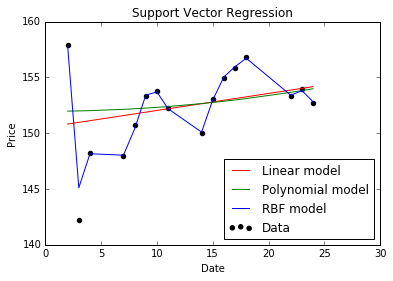

In [6]:
def plot_predictions(dates, prices, models, names, colors):
    # plotting scatter points for ground truth
    plt.scatter(dates, prices, color='black', label='Data')
    
    # plotting for each model
    for model, name, color in zip(models, names, colors):
        plt.plot(dates, model.predict(dates), color=color, label=name)
        
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend(loc='lower right')
    plt.show()
    return

# defining colors for each classifier
colors = ['red', 'green', 'blue']

# plot predictions
plot_predictions(dates, prices, models, names, colors)